<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

### Problem Statement

This project analyzes SAT results for students applying to different majors or colleges. The aim is to provide recommendations for students, especially those who may not have a clear preference on major or college. Hence, the insights are meant to facilitate decision-making processs for students in deciding what majors or colleges to go for.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets

The datasets used in the analysis were as follows:

* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major ([source](https://reports.collegeboard.org/media/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf))
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges ([source](https://www.compassprep.com/college-profiles/))

### Outside Research

The total SAT score is a number between 400 and 1600. The total score is the sum of the two section scores: Evidence-Based Reading and Writing, and Math. Each of these two section scores has a possible range of 200–800 ([*source*](https://satsuite.collegeboard.org/sat/scores/understanding-scores/how-scores-are-calculated)).

### Data Dictionary



* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): abbreviated as sat_major
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): abbreviated as sat_college

|Feature|Type|Dataset|Description|
|---|---|---|---|
intended_college_major|string|sat_major|Majors that students intend to take
test_takers|float|sat_major|Number of test takers for each major
percent|float|sat_major|Percentage of test takers for each major
total|integer|sat_major|Total SAT scores
reading_writing|integer|sat_major|SAT reading and writing section scores
math|integer|sat_major|SAT math section scores
score_disparity|integer|sat_major|Difference between math scores and reading and writing scores
school|string|sat_college|Name of schools
number_of_applicants|integer|sat_college|Number of applicants applying for the school
accept_rate|float|sat_college|Percentage of applicants accpeted out of all applicants
sat_25th_percentile|float|sat_college|25th percentile of SAT scores
accepted_applicants|integer|sat_college|Number of accepted applicants

### Data Import and Cleaning

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats

#### Data Import

In [6]:
#Import 1st dataset: 2019 SAT Scores by Intended College Major
sat_major = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
print(sat_major.shape)
sat_major.head()

(38, 6)


,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [7]:
#Import 2nd dataset: Ranges of Accepted ACT & SAT Student Scores by Colleges
sat_college = pd.read_csv('../data/sat_act_by_college.csv')
print(sat_college.shape)
sat_college.head()

(416, 8)


,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


#### Missing Values

In [8]:
#Check for missing values in sat_major: 2019 SAT Scores by Intended College Major
sat_major.isnull().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

No missing value is observed in sat_major.

In [9]:
#Check for missing values in sat_college: Ranges of Accepted ACT & SAT Student Scores by Colleges
sat_college.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

6 missing values were observed in the column 'sat_total_25th-75th_percentile'. These 6 observations may be dropped in subsequent steps, because:
1. this column will be the main focus of subsequent analysis
2. 6 observations only constitutes 1.4% of the 416 observations and hence should not have a huge impact

#### Check Data Types

In [10]:
#Check for incorrect data types in sat_major
sat_major.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

In [11]:
#Convert 'Percent' from string to float
sat_major['Percent'] = sat_major['Percent'].str.replace('%','').apply(lambda x: float(x)/100)

#Convert 'TestTakers' from string to float
sat_major['TestTakers'] = sat_major['TestTakers'].str.replace(',','').apply(lambda x:float(x))
sat_major.dtypes

IntendedCollegeMajor     object
TestTakers              float64
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

In [12]:
#Check for incorrect data types in sat_college
sat_college.dtypes

School                            object
Test Optional?                    object
Applies to Class Year(s)          object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

In [13]:
#Convert 'Accept Rate' to float
sat_college['Accept Rate'] = sat_college['Accept Rate'].str.replace('%','').apply(lambda x:float(x)/100)
sat_college.dtypes

School                             object
Test Optional?                     object
Applies to Class Year(s)           object
Policy Details                     object
Number of Applicants                int64
Accept Rate                       float64
SAT Total 25th-75th Percentile     object
ACT Total 25th-75th Percentile     object
dtype: object

In [14]:
#Clean up the column 'SAT Total 25th-75th Percentile'
#1.remove empty space, \u200b
#2.remove --
#3.replace empty strings with null value
sat_college['SAT Total 25th-75th Percentile'] = sat_college['SAT Total 25th-75th Percentile'].str.replace(r'[\u200b,\s]','').replace('--','').replace('',np.nan)

/var/folders/t3/8nf6b8z946b831z2hkj3fdkw0000gn/T/ipykernel_61689/783183867.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sat_college['SAT Total 25th-75th Percentile'] = sat_college['SAT Total 25th-75th Percentile'].str.replace(r'[\u200b,\s]','').replace('--','').replace('',np.nan)


In [15]:
#Split 'SAT Total 25th-75th Percentile' into 2 columns
sat_college[['SAT 25th Percentile','SAT 75th Percentile']] = sat_college['SAT Total 25th-75th Percentile'].str.split('-',1,expand=True)

In [16]:
#Convert SAT 25th Percentile','SAT 75th Percentile' to float
sat_college['SAT 25th Percentile'] = [float(item) for item in sat_college['SAT 25th Percentile']]
sat_college['SAT 75th Percentile'] = [float(item) for item in sat_college['SAT 75th Percentile']]
sat_college.dtypes

School                             object
Test Optional?                     object
Applies to Class Year(s)           object
Policy Details                     object
Number of Applicants                int64
Accept Rate                       float64
SAT Total 25th-75th Percentile     object
ACT Total 25th-75th Percentile     object
SAT 25th Percentile               float64
SAT 75th Percentile               float64
dtype: object

#### Duplicate Values

In [17]:
#Check for duplciate values in sat_major
sat_major['IntendedCollegeMajor'].nunique() == len(sat_major)

True

In [18]:
#Check for duplicate values in sat_college
sat_college['School'].nunique() == len(sat_college)

True

All rows are distinct and there are no duplicate values.

#### Check Data Range

In [19]:
#Check data range of sat_major
sat_major.describe()

,TestTakers,Percent,Total,ReadingWriting,Math
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,48394.500000,0.025789,1058.500000,535.500000,523.000000
std,72753.092558,0.039975,82.445969,41.362439,43.386385
min,283.000000,0.000000,916.000000,458.000000,456.000000
25%,6611.000000,0.000000,988.250000,501.250000,486.500000
50%,16370.500000,0.010000,1066.500000,537.000000,527.000000
75%,60215.750000,0.035000,1115.500000,569.750000,542.250000
max,331026.000000,0.180000,1242.000000,597.000000,646.000000


In [20]:
#Check data range of sat_college
sat_college.describe()

,Number of Applicants,Accept Rate,SAT 25th Percentile,SAT 75th Percentile
count,416.000000,416.000000,410.000000,410.000000
mean,17481.759615,0.557034,1167.008537,1358.892683
std,17447.621897,0.242117,129.586121,111.431443
min,211.000000,0.043000,793.000000,1050.000000
25%,5313.000000,0.376250,1070.000000,1270.000000
50%,11622.000000,0.613000,1150.000000,1350.000000
75%,23599.750000,0.742250,1250.000000,1440.000000
max,111322.000000,0.999000,1530.000000,1580.000000


Total SAT score is within 1600. 
Reading and writing score is within 800.
Math score is within 800.
These scores all fall within the reasonable range and there is no obvious data flaw in these values.

#### Rename Columns

In [21]:
#sat_major: before renaming
sat_major.columns

Index(['IntendedCollegeMajor', 'TestTakers', 'Percent', 'Total',
       'ReadingWriting', 'Math'],
      dtype='object')

In [22]:
#sat_major: after renaming
#Convert from Camel Cake to snake_case
def camel2snake(name):
    return name[0].lower() + re.sub(r'(?!^)[A-Z]', lambda x: '_' + x.group(0).lower(), name[1:])

sat_major.columns = sat_major.columns.map(camel2snake)
sat_major.columns

Index(['intended_college_major', 'test_takers', 'percent', 'total',
       'reading_writing', 'math'],
      dtype='object')

In [23]:
#sat_college: before renaming
sat_college.columns

Index(['School', 'Test Optional?', 'Applies to Class Year(s)',
       'Policy Details', 'Number of Applicants', 'Accept Rate',
       'SAT Total 25th-75th Percentile', 'ACT Total 25th-75th Percentile',
       'SAT 25th Percentile', 'SAT 75th Percentile'],
      dtype='object')

In [24]:
#sat_college: after renaming
#lowercase all characters
#replace space with _
sat_college.columns = sat_college.columns.str.lower().str.replace(' ','_')
sat_college.columns

Index(['school', 'test_optional?', 'applies_to_class_year(s)',
       'policy_details', 'number_of_applicants', 'accept_rate',
       'sat_total_25th-75th_percentile', 'act_total_25th-75th_percentile',
       'sat_25th_percentile', 'sat_75th_percentile'],
      dtype='object')

#### Additional Data Transformation

In [25]:
#sat_major : add a column 'score_disparity'
#score disparity = math - reading_writing
sat_major['score_disparity'] = sat_major['math']-sat_major['reading_writing']

In [26]:
#sat_college: add a column 'accepted_applicants' for each college
#accepted applicants = number of applicants * acceptance rate
#round to whole number
sat_college['accepted_applicants'] = (sat_college['number_of_applicants']*sat_college['accept_rate']).apply(lambda x:round(x))

#### Drop Columns/Rows

In [27]:
#sat_college: remove rows with missing values
sat_college.dropna(subset=['sat_total_25th-75th_percentile'], inplace=True)
print(sat_college.shape)

(410, 11)


In [28]:
#sat_college: remove unused columns
columns_exclude = ['test_optional?','applies_to_class_year(s)','policy_details','sat_total_25th-75th_percentile',
                 'act_total_25th-75th_percentile','sat_75th_percentile']
sat_college.drop(columns = columns_exclude,inplace=True)

#### Save Cleaned DataFrame as csv files

In [29]:
#Create a folder for output
import os
if not os.path.exists('output'):
    os.makedirs('output')
    
#Save sat_major
sat_major.to_csv('output/sat_major.csv')

#Save sat_college
sat_college.to_csv('output/sat_college.csv')

### Exploratory Data Analysis

#### Exploratory analysis for sat_major

##### Summary statistics

In [30]:
#Summary statistics
sat_major.describe()

,test_takers,percent,total,reading_writing,math,score_disparity
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,48394.500000,0.025789,1058.500000,535.500000,523.000000,-12.500000
std,72753.092558,0.039975,82.445969,41.362439,43.386385,19.727536
min,283.000000,0.000000,916.000000,458.000000,456.000000,-52.000000
25%,6611.000000,0.000000,988.250000,501.250000,486.500000,-25.750000
50%,16370.500000,0.010000,1066.500000,537.000000,527.000000,-15.000000
75%,60215.750000,0.035000,1115.500000,569.750000,542.250000,-0.750000
max,331026.000000,0.180000,1242.000000,597.000000,646.000000,49.000000


In [31]:
#Statistics of people with undecided major
sat_major[sat_major['intended_college_major'] == 'Undecided']

,intended_college_major,test_takers,percent,total,reading_writing,math,score_disparity
37,Undecided,126939.0,0.07,1069,538,532,-6


- 7% of test-takers have no clear preference on majors.
- Test performance of students with no preference on majors looks about the same as the entire student sample.

##### 1. What majors are most and least **popular**?

In [32]:
#Top 5 in test_takers
sat_major[['intended_college_major','test_takers','percent']].sort_values(by=['test_takers'], ascending=False).head()

,intended_college_major,test_takers,percent
14,Health Professions and related Clinical Sciences,331026.0,0.18
4,"Business, Management, Marketing, and Related S...",221523.0,0.12
9,Engineering,194127.0,0.11
3,Biological and Biomedical Sciences,155834.0,0.08
35,"Visual and Performing Arts, General",130642.0,0.07


In [33]:
#Bottom 5 in test_takers
sat_major[['intended_college_major','test_takers']].sort_values(by=['test_takers'], ascending=True).head()

,intended_college_major,test_takers
18,Library Science/Librarianship,283.0
28,Precision Production,319.0
34,Transportation and Materials Moving,1105.0
33,Theology and Religious Vocations,1991.0
7,"Construction Trades, General",2500.0


In [34]:
#Percentage of test takers among top 5 most popular majors
sat_major.sort_values(by='test_takers', ascending=False).head()['percent'].sum()

0.56

- The top 5 most popular majors are Health Professions, Business, Engineering, Biological and Biomedical Sciences, and Visual and Performing Arts. 
- The 5 majors are pursued after by 56% of test takers.
- This may be a good reference for students who want to take up a popular major.

##### 2. What majors have the highest and lowest average total scores?

In [35]:
#Top 5 in total scores
sat_major[['intended_college_major','total']].sort_values(by=['total'], ascending=False).head()

,intended_college_major,total
19,Mathematics and Statistics,1242
27,Physical Sciences,1203
32,Social Sciences,1164
6,Computer and Information Sciences and Support ...,1156
22,Multi/Interdisciplinary Studies,1155


In [36]:
#Bottom 5 in total scores
sat_major[['intended_college_major','total']].sort_values(by=['total'], ascending=True).head()

,intended_college_major,total
20,Mechanic and Repair Technologies/Technicians,916
7,"Construction Trades, General",919
25,"Personal and Culinary Services, General",929
28,Precision Production,932
12,Family and Consumer Sciences/Human Sciences,953


- The top 5 most competitive majors have an average SAT scores between 1150 and 1250.
- Students may be able to consider these majors only if they manage to score within this range, minimally.

##### 3. What majors have the highest disparity in section scores (math vs reading and writing)

In [37]:
#Top 5 majors where math score is higher than reading and writing
sat_major[['intended_college_major','score_disparity']].sort_values(by=['score_disparity'], ascending=False).head()

,intended_college_major,score_disparity
19,Mathematics and Statistics,49
9,Engineering,22
10,Engineering Technologies/Technicians,16
6,Computer and Information Sciences and Support ...,14
27,Physical Sciences,9


In [38]:
#Top 5 majors where reading and writing score is higher than math
sat_major[['intended_college_major','score_disparity']].sort_values(by=['score_disparity'], ascending=True).head()

,intended_college_major,score_disparity
11,English Language and Literature/Letters,-52
18,Library Science/Librarianship,-50
15,"History, General",-36
2,"Area, Ethnic, Cultural, and Gender Studies",-32
5,"Communication, Journalism, and Related Programs",-31


- Generally, applicants strong in math tend to apply for Science majors, and applicants strong in reading and writing tend to apply for Arts majors.

##### Summary of Findings

**Insights**
- 7% of students do not have a preferred major. Average test performance of student without preferred major is the same as the rest.
- For students who want to go for popular majors, the top 5 most popular majors are Health Professions, Business, Engineering, Biological and Biomedical Sciences, and Visual and Performing Arts. The 5 majors are pursued after by 56% of test takers.
- The most competitive majors have an average SAT scores between 1150 and 1250 (such as Mathematics and Statistics). Students may be able to consider these majors only if they manage to score within this range, minimally.
- For students who have shown strength in either math or reading and writing, they can consider majors that suit their strength. Generally, applicants strong in math tend to apply for Science majors, and applicants strong in reading and writing tend to apply for Arts majors.


#### Exploratory analysis for sat_college

##### Summary statistics

In [39]:
#Overall summary statistics
sat_college.describe()

,number_of_applicants,accept_rate,sat_25th_percentile,accepted_applicants
count,410.000000,410.000000,410.000000,410.000000
mean,17586.614634,0.553344,1167.008537,8391.990244
std,17533.678784,0.241454,129.586121,7739.711871
min,211.000000,0.043000,793.000000,164.000000
25%,5374.500000,0.368750,1070.000000,2369.500000
50%,11715.500000,0.609500,1150.000000,5215.000000
75%,24046.750000,0.741000,1250.000000,13072.250000
max,111322.000000,0.999000,1530.000000,35304.000000


In [40]:
#Median
sat_college.median(axis = 0, numeric_only=True)

number_of_applicants    11715.5000
accept_rate                 0.6095
sat_25th_percentile      1150.0000
accepted_applicants      5215.0000
dtype: float64

In [41]:
#Standard Deviation Using Custom Functions
def std (column):
    standard_deviation = (np.mean([(item - np.mean(column)) ** 2 for item in column])**0.5)
    return standard_deviation

sat_college_std = {column:std(sat_college[column]) for column in sat_college.select_dtypes(exclude = 'object')}
sat_college_std

{'number_of_applicants': 17512.283194814878,
 'accept_rate': 0.2411598625229498,
 'sat_25th_percentile': 129.42799316582017,
 'accepted_applicants': 7730.267435496334}

- 25th percentile can be used as the rough gauge of entry requirement. The average and median of entry requirement is 1167 and 1150 respectively.
- This means that students with a score of 1150 or above can apply for at leat half of the schools listed.

##### 1. Which colleges are most and least popular, as measured by **number of applicants**?

In [42]:
#Top 5 in number of applicants
top_5_num_of_applicants = sat_college[['school','number_of_applicants']].sort_values(by=['number_of_applicants'], ascending=False).head()
top_5_num_of_applicants
#Alternatively
#sat_college.nlargest(5, columns = 'accepted_applicants')

,school,number_of_applicants
24,University of California—​Los Angeles,111322
72,University of California—​San Diego,97901
60,University of California—​Irvine,95568
69,University of California—​Santa Barbara,93457
33,University of California—​Berkeley,89621


In [43]:
#Bottom 5 in number of applicants
sat_college[['school','number_of_applicants']].sort_values(by=['number_of_applicants'], ascending=True).head()

,school,number_of_applicants
410,Thomas Aquinas College,211
100,Soka University of America,464
401,Gallaudet University,496
170,St. John's College Annapolis,913
367,Mills College,1003


- University of California is popular among students. The 5 campuses topped in number of applicants.
- This can be a reference for students who make decisions based on what is popular among other applicants.

##### 2. Which colleges accept the most and least number of applicants?

In [44]:
#Top 5 in accepted applicants
sat_college[['school','accepted_applicants']].sort_values(by=['accepted_applicants'], ascending=False).head()

,school,accepted_applicants
135,Pennsylvania State University—​University Park,35304
360,University of Arizona,34562
308,Indiana University—​Bloomington,33966
184,Purdue University—​West Lafayette,32837
319,University of Colorado—​Boulder,31940


In [45]:
#Bottom 5 in accepted applicants
sat_college[['school','accepted_applicants']].sort_values(by=['accepted_applicants'], ascending=True).head()

,school,accepted_applicants
410,Thomas Aquinas College,164
100,Soka University of America,180
401,Gallaudet University,283
393,United States Coast Guard Academy,291
39,The Cooper Union,392


In [46]:
#Max number of accepted applicants/average number of accepted applicants
sat_college['accepted_applicants'].max()/sat_college['accepted_applicants'].mean()

4.206868570378956

- The largest schools take in more than 30000 applicants per year, which is more than 4 times the average intake. These may be suited for students who look out for larger schools.

##### Summary of Findings

**Insights**
- The median of entry requirement, as estimated from the 25th percentile, is 1150. Students with a score of 1150 or above can rest assured that they are eligible to apply for at least half of the schools listed.
- For students who make decisions with reference to what is popular among other applicants, University of California is a popular choice. The 5 different University of California campuses topped in number of applicants across all colleges.
- The largest schools take in more than 30000 applicants per year, which is more than 4 times the average intake. These may be suited for students who look out for larger schools.
- Generally, schools with higher entry requirement also have greater number of applicants and lower accpetance rate. Hence, students can gauge the competitiveness of their applications based on their score range.


### Visualize the Data

#### Visualisation for sat_major

##### Correlation of SAT scores (Heatmap, scatterplot)

In [47]:
#Correlation Table
corr_table_sat_major = sat_major[['total','math','reading_writing']].corr()
corr_table_sat_major

,total,math,reading_writing
total,1.000000,0.973682,0.971867
math,0.973682,1.000000,0.892710
reading_writing,0.971867,0.892710,1.000000


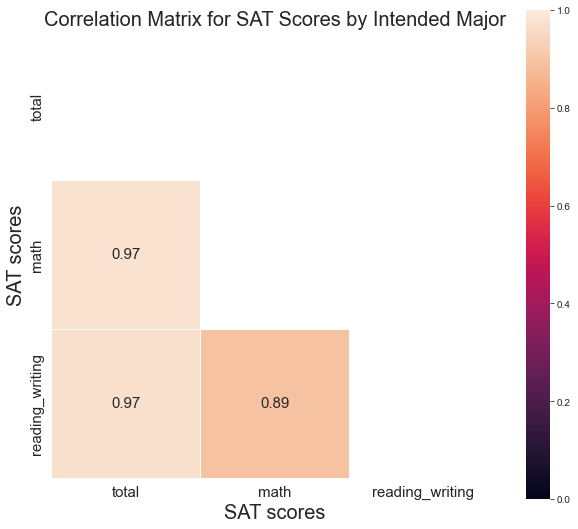

In [48]:
#Heatmap
plt.figure(figsize= (10, 9))
mask = np.zeros_like(corr_table_sat_major)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_table_sat_major, mask = mask, square = True, annot = True,
                annot_kws={'fontsize':15},vmin = 0, vmax = 1, linewidths = .5)

plt.title ('Correlation Matrix for SAT Scores by Intended Major', fontsize = 20);
plt.xlabel('SAT scores',fontsize=20)
plt.ylabel('SAT scores',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.set(font_scale=2);

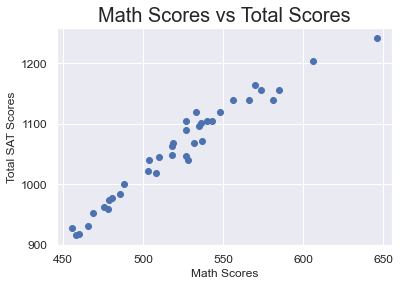

In [49]:
#Math Scores vs Total Scores
plt.scatter(x=sat_major['math'], y=sat_major['total'])
plt.title('Math Scores vs Total Scores',fontsize=20)
plt.xlabel('Math Scores',fontsize=12)
plt.ylabel('Total SAT Scores',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

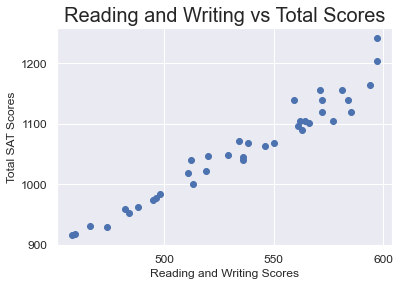

In [50]:
#Reading and Writing vs Total Scores
plt.scatter(x=sat_major['reading_writing'], y=sat_major['total'])
plt.title('Reading and Writing vs Total Scores',fontsize=20)
plt.xlabel('Reading and Writing Scores',fontsize=12)
plt.ylabel('Total SAT Scores',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Based on observations from both heatmaps and scatter plots:
- Total score is highly correlated with both math scores, and reading and writing scores.
- Performances on subsections are highly correlated, as math scores is correlated with reading and writing scores with r=0.89

##### Distribution of SAT scores (Histograms, Bar plot)

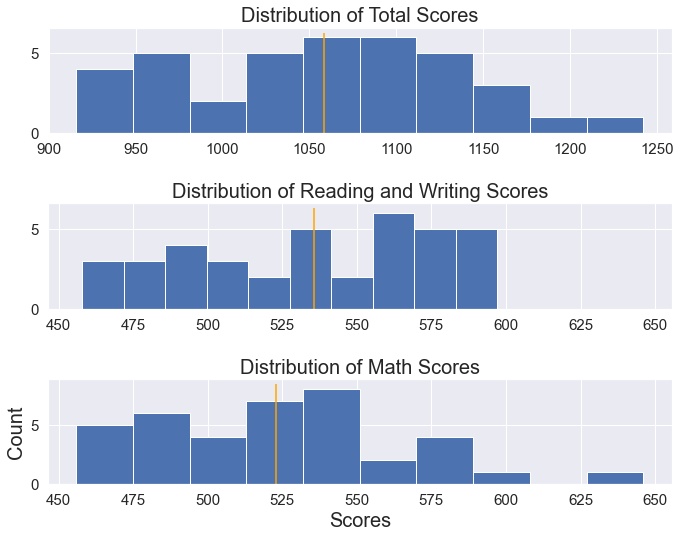

In [51]:
#Histograms of total scores, reading_writing scores, math scores
plt.figure(figsize = (10,8))

# total scores
ax1 = plt.subplot(3,1,1)
ax1.set_title('Distribution of Total Scores', fontsize=20)
plt.hist(sat_major['total']);
ymin1, ymax1 = ax1.get_ylim()
ax1.vlines(x = sat_major['total'].mean(), ymin = ymin1, ymax = ymax1, color = 'orange')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# reading_writing
ax2 = plt.subplot(3,1,2)
ax2.set_title('Distribution of Reading and Writing Scores', fontsize=20)
plt.hist(sat_major['reading_writing']);
ymin2, ymax2 = ax2.get_ylim()
ax2.vlines(x = sat_major['reading_writing'].mean(), ymin = ymin2, ymax = ymax2, color = 'orange')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# math
ax3 = plt.subplot(3,1,3, sharex =ax2)
ax3.set_title('Distribution of Math Scores',fontsize=20)
plt.hist(sat_major['math']);
ymin3, ymax3 = ax3.get_ylim()
ax3.vlines(x = sat_major['math'].mean(), ymin = ymin3, ymax = ymax3, color = 'orange')

plt.xlabel('Scores', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout();

In [52]:
#Total Scores - Skew and Kurtosis
print(skew(sat_major['total'], axis=0, bias=True))
print(kurtosis(sat_major['total'], axis=0, bias=True))

#Reading and Writing Scores - Skew and Kurtosis
print(skew(sat_major['reading_writing'], axis=0, bias=True))
print(kurtosis(sat_major['reading_writing'], axis=0, bias=True))

#Math Scores - Skew and Kurtosis
print(skew(sat_major['math'], axis=0, bias=True))
print(kurtosis(sat_major['math'], axis=0, bias=True))

0.001720181362417322
-0.7081307082402177
-0.29941902921375285
-1.0648587970766612
0.5428624774046591
0.2261234221730999


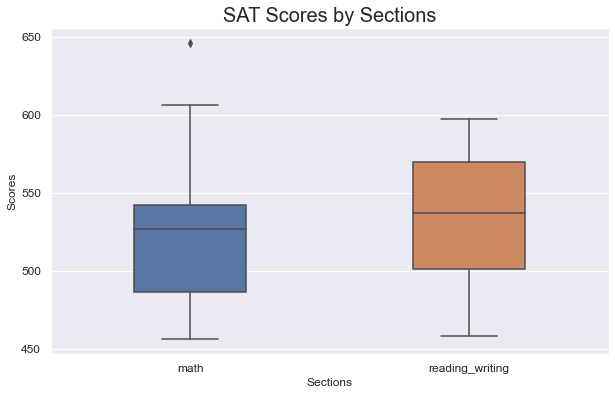

In [53]:
#Box Plots for Math vs Reading_Writing
plt.figure(figsize=(10,6))
sns.boxplot(data=sat_major[['math','reading_writing']],width=0.4);

plt.title('SAT Scores by Sections',fontsize=20)
plt.ylabel('Scores', fontsize=12)
plt.xlabel('Sections', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [54]:
#Find the outlier in math score
sat_major.sort_values(by='math', ascending=False).head(1)

,intended_college_major,test_takers,percent,total,reading_writing,math,score_disparity
19,Mathematics and Statistics,16508.0,0.01,1242,597,646,49


- The distribution of test scores can be said to be approximately normal, as kurtosis and skew were all within 3 and -3.
- An outlier is observed for math scores based on box plot. The outlier is Mathematics and Statistics Major for which students had extremely high score in the math section. Presence of this outlier may pull up the average math scores slightly.

##### 1. What major is most popular?

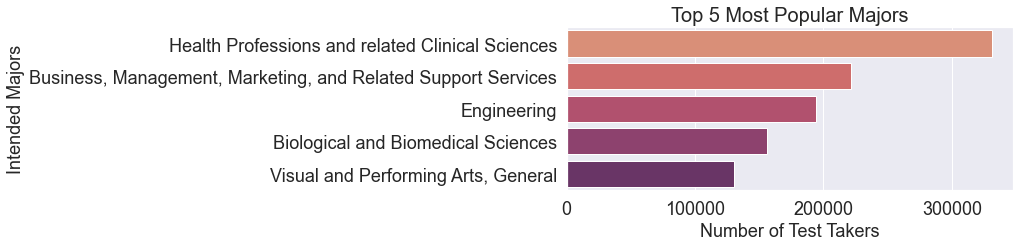

In [55]:
#Bar plot of number of test_takers, subset the top 5
plt.figure(figsize = (8,3))
sat_major = sat_major.sort_values('test_takers', ascending=False)

sns.barplot(x= sat_major['test_takers'].head(),
            y= sat_major['intended_college_major'].head(),
            palette = "flare")

plt.title('Top 5 Most Popular Majors',fontsize=20)
plt.xlabel('Number of Test Takers',fontsize=18)
plt.ylabel('Intended Majors',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18);

- The top 5 most popular majors all have more than 100000 test takers.

##### 2. What major has the highest average total scores?

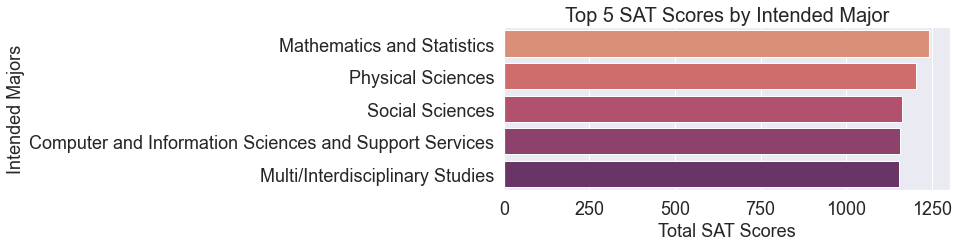

In [56]:
# Bar plot of total scores, subset the top 5
plt.figure(figsize = (8, 3))

sat_major = sat_major.sort_values('total', ascending=False)

sns.barplot(x= sat_major['total'].head(),
            y= sat_major['intended_college_major'].head(),
            palette = "flare")

plt.title('Top 5 SAT Scores by Intended Major',fontsize=20)
plt.xlabel('Total SAT Scores',fontsize=18)
plt.ylabel('Intended Majors',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18);

- The top 5 most competitive majors were identified as above.

##### 3. What majors have the highest disparity in section scores (math vs reading and writing)?

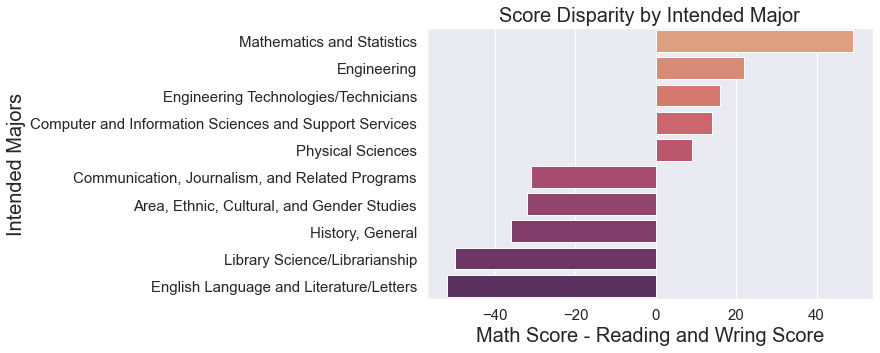

In [57]:
#Bar plots of score disparity, subset only the top 5 and bottom 5
plt.figure(figsize = (8, 5))

sort_by_score_disparity = sat_major.sort_values('score_disparity', ascending=False)
top_and_bottom_5 = pd.concat([sort_by_score_disparity.head(), sort_by_score_disparity.tail()])

sns.barplot(x= top_and_bottom_5['score_disparity'],
            y= top_and_bottom_5['intended_college_major'],
            palette = "flare")

plt.title('Score Disparity by Intended Major',fontsize=20)
plt.xlabel('Math Score - Reading and Wring Score',fontsize=20)
plt.ylabel('Intended Majors',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

- Huge disparity is observed in performance in the two sections of SAT.
- Students performed much higher on math than reading and writing for the 5 Science subjects.
- On the other hands, students performed much higher on reading and writing than math for the 5 Arts subjects.

#### Visualisation for sat_college

##### Correlation

In [58]:
#Correlation Table
corr_table_sat_college = sat_college[['number_of_applicants','accept_rate','sat_25th_percentile','accepted_applicants']].corr()
corr_table_sat_college

,number_of_applicants,accept_rate,sat_25th_percentile,accepted_applicants
number_of_applicants,1.000000,-0.317165,0.252431,0.716756
accept_rate,-0.317165,1.000000,-0.798352,0.244406
sat_25th_percentile,0.252431,-0.798352,1.000000,-0.210035
accepted_applicants,0.716756,0.244406,-0.210035,1.000000


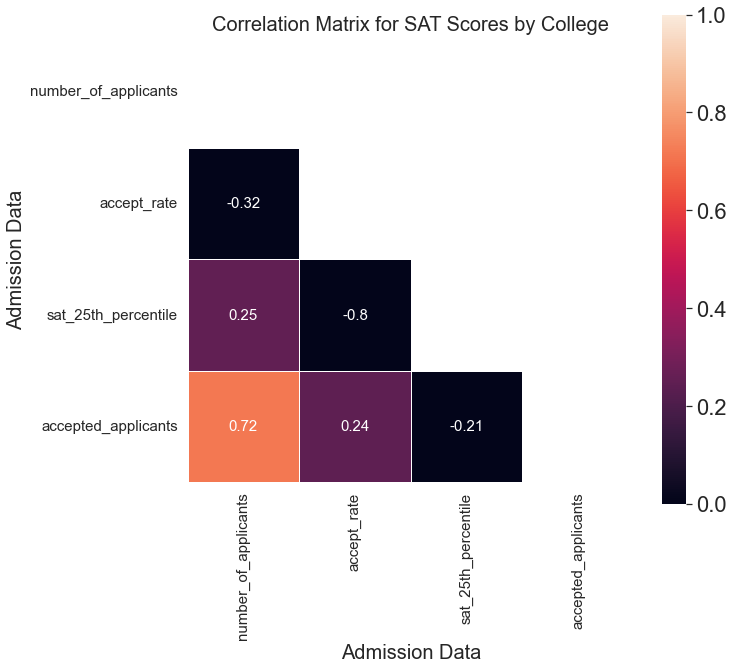

In [59]:
#Heatmap
plt.figure(figsize= (10, 9))
mask = np.zeros_like(corr_table_sat_college)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_table_sat_college, mask = mask, square = True, annot = True,
                annot_kws={'fontsize':15},vmin = 0, vmax = 1, linewidths = .5)

plt.title ('Correlation Matrix for SAT Scores by College', fontsize = 20);
plt.xlabel('Admission Data',fontsize=20)
plt.ylabel('Admission Data',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

- Higher entry requirement (25th percentile) is negatively associated with acceptance rate with r = -0.8. The higher the entry requirement is, the lower the acceptance rate.
- Number of applicants is positively associated with number of accepted applicants with r=0.72. The more popular schools with higher number of applicants tend to take in more applicants as well.

##### 1. Which colleges are the most popular?

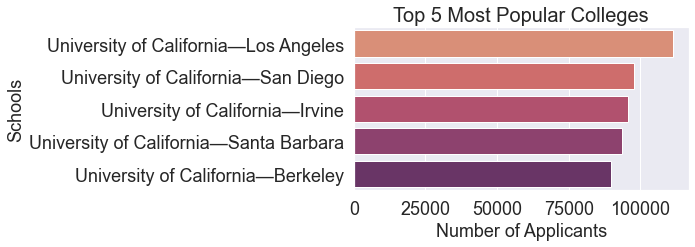

In [60]:
# Bar plot of number of applicants, subset the top 5
plt.figure(figsize = (6,3))
sat_college = sat_college.sort_values('number_of_applicants', ascending=False)
sns.barplot(x= sat_college['number_of_applicants'].head(),
            y= sat_college['school'].head(),
            palette = "flare")

plt.title('Top 5 Most Popular Colleges',fontsize=20)
plt.xlabel('Number of Applicants',fontsize=18)
plt.ylabel('Schools',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18);

- The top 5 most popular schools are all within the University of California school system.

##### 2. Which colleges accept the most applicants?

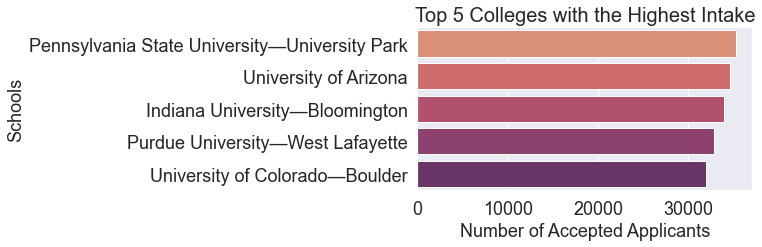

In [61]:
# Bar plot of number of accepted applicants, subset the top 5
plt.figure(figsize = (6,3))
sat_college = sat_college.sort_values('accepted_applicants', ascending=False)
sns.barplot(x= sat_college['accepted_applicants'].head(),
            y= sat_college['school'].head(),
            palette = "flare")

plt.title('Top 5 Colleges with the Highest Intake',fontsize=20)
plt.xlabel('Number of Accepted Applicants',fontsize=18)
plt.ylabel('Schools',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18);

## Conclusions and Recommendations

**Recommendations on Majors**
- 7% of students do not have a preferred major. Average test performance of student without preferred major is the same as the rest.
- For students who want to go for popular majors, the top 5 most popular majors are Health Professions, Business, Engineering, Biological and Biomedical Sciences, and Visual and Performing Arts. The 5 majors are pursued after by 56% of test takers.
- The most competitive majors have an average SAT scores between 1150 and 1250 (such as Mathematics and Statistics). Students may be able to consider these majors only if they manage to score within this range, minimally.
- For students who have shown strength in either math or reading and writing, they can consider majors that suit their strength. Generally, applicants strong in math tend to apply for Science majors, and applicants strong in reading and writing tend to apply for Arts majors.

**Recommendations on Colleges**
- The median of entry requirement, as estimated from the 25th percentile, is 1150. Students with a score of 1150 or above can rest assured that they are eligible to apply for at least half of the schools listed.
- For students who want to go for popular colleges, University of California is a popular choice. The 5 different University of California campuses topped in number of applicants across all colleges.
- The largest schools take in more than 30000 applicants per year, which is more than 4 times the average intake. Students who look out for larger schools can consider schools with greater intake.
- Generally, schools with higher entry requirement also have greater number of applicants and lower accpetance rate. Hence, students can gauge the competitiveness of their applications based on their score range.
